# Table of Contents <a id="contents"></a>

1. [Introduction](#introduction) <br>
    1.1 [Problem Statement](#contents)    
    1.2. [Importing Libraries](#importing_libraries) <br>
    1.3. [Data Description](#data) <br>
    1.4. [Loading Data](#loading_data) <br><br>

2. [Data Preprocessing](#preprocessing) <br>
    2.1 [Checking for Null Entries](#null_entries) <br>
    2.2 [Checking Count of each Language](#language_count) <br>
    
3. [Exploratory Data Analysis](#EDA) <br>
    3.1 [Creating WordCloud](#wordcloud) <br>
    3.2 [Checking Count of each Language](#text_slice)<br>
    3.3 [Removing numbers and punctuations](#numbers_punctuations)<br><br>
    
4. [Modeling](#model) <br>
    4.1 [Multinomial Naive Bayes](#mnb)
    4.2 [Support Vector Machines (SVM)](#svm) <br>
    4.3 [Linear SVC)](#lsvc) <br>
    4.4 [Model Tuning](#model_tuning)<br>

# 1. Introduction<a id="introduction"></a>
[Table of Contents](#contents)

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

## 1.1 Problem Statement<a id="problem_statement"></a>
[Table of Contents](#contents)

With such a multilingual population, it is only obvious that the South African systems and devices also communicate in multi-languages.

South Africa is therfore in need of a solution that will take text in any of the 11 Official languages and identify which language the text is in.

## 1.2 Importing Libraries <a id="importing_libraries"></a>
[Table of Contents](#contents)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Library for predictive data analysis
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Keras library for artificial neural networks
from keras.preprocessing.text import Tokenizer

from wordcloud import WordCloud

## 1.3 Data Description<a id="data"></a>
[Table of Contents](#contents)

The dataset used is the NCHLT Text Corpora collected by the South African Department of Arts and Culture & Centre for Text Technology (CTexT, North-West University, South Africa). The training set was improved through additional cleaning done by Praekelt.

The data is in the form Language ID, Text. The language Ids are as follows:
- afr - Afrikaans
- eng - English
- nbl - isiNdebele
- nso - Sepedi
- sot - Sesotho
- ssw - siSwati
- tsn - Setswana
- tso - Xitsonga
- ven - Tshivenda
- xho - isiXhosa
- zul - isiZulu

## 1.4 Loading Data<a id="loading_data"></a>
[Table of Contents](#contents)

In [2]:
# import dataset 
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')

The data sets will be copied to avoid loosing the original data

In [3]:
train_df = train.copy()
test_df = test.copy()

Let’s check the first few rows of the both datasets.

In [4]:
train_df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
test_df.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


# 2. Data Preprocessing<a id="preprocessing"></a>
[Table of Contents](#contents)

Let us start by doing the most basic data cleaning processes.

## 2.1 Checking for Null Entries <a id="language_count"></a>
[Table of Contents](#contents)

In [6]:
train_df.isnull().sum()

lang_id    0
text       0
dtype: int64

In [7]:
test_df.isnull().sum()

index    0
text     0
dtype: int64

There are no null values on either datasets. 

## 2.2 Checking Count of each Language

We will now take a look at all the languages present in the train dataset and their corresponding counts

In [8]:
train_df["lang_id"].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

The train dataset contains 11 languages with 3000 sentences from each language. The dataset is therefore very balanced and has no missing values. The dataset is ready to be used to train a machine learning model.

# 3. Exploratory Data Analysis<a id="EDA"></a>
[Table of Contents](#contents)

## 3.1 Creating WordCloud<a id="wordcloud"></a>
[Table of Contents](#contents)

Let us explore the  the most recurrent words across all observations in a wordcloud image

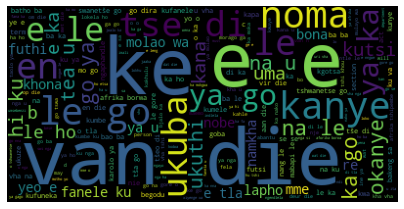

In [10]:
full_text = " ".join(train_df['text'])

wc = WordCloud(background_color='black')
img = wc.generate(full_text)
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.show()

## 3.2 Observe Slice of Text<a id="text_slice"></a>
[Table of Contents](#contents)

Next, we will check out a slice in the text lenght for each observation to determine what cleaning needs to be done.

In [11]:
for text in test_df['text'][2000:2010]:
    print(text)

mabalane wa khothe ya ndinganyiso' zwi amba mabalane wa khothe ya ndinganyiso o tholiwaho kana o nangiwaho u ya nga khethekanyo 17, yo vhalwaho na khethekanyo 31, yo katela na zwi.
Khethululo zwi songo tea kha u. etshedza dzimbuelo, dzitshomedzo dzine dza tshimbilelana na ndindakhombo.
Komiti ya Tshepetšo: E thuša BOT mo go netefatšeng tshepetšo e botse ya setlamo, bjale ka go kgoboketša ditefelo, ditefelo tša dikgopelo le tlhokomelo ya direkhoto tša leloko. Komiti gape e thuša BOT ka thekišo le kwalakwatšo.
Indlu yowiso-mthetho yephondo ingaphumeza umgaqo-siseko wephondo okanye, apho kufunekayo, ingawutshintsha umgaqo-siseko wayo, ukuba, ubuncinane, isibini kwisithathu samalungu ayo avotela ukuwuvuma uMthetho oYilwayo wokwenjenjalo.
Ngano dza tsiko.
<fn>GOV-ZA.WQFlyer_afr.2010-03-25.af.txt</fn>
Mfuwo, vukhongeri na tindzimi: Vaaki va nga tiphina hi mfuwo wa vona, va landzelela vukhongeri bya vona no tirhisa ririmi ra vona.
Ukubonelela kunye nokukhusela ulimo kwiifama.
Bakeng sa ho tsw

Although the data looked clean at first glance, the following observations were made:

- The text still contains numbers and special characters as seen above.
- Some lines contain two or more languages. This will likely inhibit a 100% prediction accuracy.
- The local languages have compound words whose meaning may be affected by punctutaions cleaning.
- Train data set is perfectly balanced

## 3.3 Removing numbers and punctuations<a id="numbers_punctuations"></a>
[Table of Contents](#contents)

In [12]:
# Creating a function to remove numbers and punctuations

punc_numbers = string.punctuation + '0123456789'

def remove_punctuation(post):
  # This function returns a string item that has no punctuation marks and numbers
  punc_numbers = string.punctuation + '0123456789'
  return ''.join([l for l in post if l not in punc_numbers])

NameError: name 'string' is not defined

In [13]:
# removing punctuation on both datasets
train_df['text'] = train_df['text'].apply(remove_punctuation)
test_df['text'] = test_df['text'].apply(remove_punctuation)

NameError: name 'remove_punctuation' is not defined

In [14]:
# Taking a look at the train dataset
train_df.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


In [15]:
# Taking a look at the test dataset
train_df.tail()

,lang_id,text
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999,sot,mafapha a mang le ona a lokela ho etsa ditlale...


Now that the data has been cleaned, let us prepare it for modeling by spliting to the train set to a subset of train and test datasets. 

In [17]:
X = np.array(train_df["text"])
y = np.array(train_df["lang_id"])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

## 4.1 Multinomial Naive Bayes<a id="mnb"></a>
[Table of Contents](#contents) 

In [19]:
mnb = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(fit_prior=False))])
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      1.00      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       1.00      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



# 4. Modeling<a id="model"></a>
[Table of Contents](#contents)

## 4.2 Support Vector Machines (SVM)<a id="svm"></a>
[Table of Contents](#contents)

A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they’re able to categorize new text.

Compared to newer algorithms like neural networks, they have two main advantages: higher speed and better performance with a limited number of samples (in the thousands). This makes the algorithm very suitable for text classification problems, where it’s common to have access to a dataset of at most a couple of thousands of tagged samples.

Let us create the model.

In [21]:
svm = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                                            alpha=1e-3, max_iter=5, random_state=42)),])
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       0.99      1.00      1.00       615
         nbl       0.98      0.98      0.98       583
         nso       0.99      0.99      0.99       625
         sot       1.00      1.00      1.00       618
         ssw       0.99      0.99      0.99       584
         tsn       0.99      0.99      0.99       598
         tso       0.99      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       0.96      0.99      0.97       609
         zul       0.98      0.93      0.96       590

    accuracy                           0.99      6600
   macro avg       0.99      0.99      0.99      6600
weighted avg       0.99      0.99      0.99      6600



## 4.3 Linear SVC<a id="lsvc"></a>
[Table of Contents](#contents)

The objective of a Linear SVC (Support Vector Classifier) is to fit to the data you provide, returning a "best fit" hyperplane that divides, or categorizes, your data. From there, after getting the hyperplane, you can then feed some features to your classifier to see what the "predicted" class is.

Let us create the model!

In [22]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
lsvc = pipeline = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC()),
            ])
lsvc.fit(X_train, y_train)
y_pred = lsvc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      1.00      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.99      0.99      0.99       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



## 4.4 Model Tuning<a id="model_tuning"></a>
[Table of Contents](#contents)

Model tuning is basically used to improve the results of a model. We will be using Grid Search to improve our models.

GridSearchCV is a technique to search through the best parameter values from the given set of the grid of parameters. It is basically a cross-validation method. the model and the parameters are required to be fed in. Best parameter values are extracted and then the predictions are made.

In [23]:
# model tuning for multinomiamNB

parameters_mnb = {'vect__ngram_range': [(1, 1), (1, 2)],
                  'tfidf__use_idf': (True, False),
                  'clf__alpha': (1e-2, 1e-3),
}

mnb_gs = GridSearchCV(mnb, parameters_mnb, n_jobs=-1)
mnb_gs = mnb_gs.fit(X,y)

In [24]:
# model tuning for Linear SVC

parameters_svm = {'vect__ngram_range': [(1, 1), (1, 2)],
          'tfidf__use_idf': (True, False),
          'clf-svm__alpha': (1e-2, 1e-3),
}
svm_gs = GridSearchCV(svm, parameters_svm, n_jobs=-1)
svm_gs = svm_gs.fit(X, y)
svm_gs.best_score_
svm_gs.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'clf-svm__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}

## Submission

In [25]:
y_test = mnb_gs.predict(test_df['text'])
output = pd.DataFrame({'index': test_df.index+1,
                       'lang_id': y_test})
output.to_csv('Lista_Abutto_Submission.csv', index=False)
output

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
